# Collective data analysis

Dette projekt går ud på at lave data exploration og visualisering af 2 datasæt, der omhandler portugiesisk Rød- og hvidvin af varianten "vinho verde".

### Indlæs og rens data

In [1]:
import pandas as pd
from WineDataExplorerPackage import *
from WineDataExplorerPackage import descriptive_statistics as ds
from WineDataExplorerPackage import plots as pl

red_wine_df = read_data_to_dataframe("data/winequality-red.xlsx", winetype="red")
white_wine_df = read_data_to_dataframe("data/winequality-white.xlsx", winetype="white")
combined_wine_df = combine_dataframes([red_wine_df, white_wine_df])

Vi har converterede tal til numeriske felter, og kontrollerede at der ikke er nogle manglende værdier, eller andet der kunne tyde på dataindtastningsfejl.

### Descriptive statistics

In [ ]:
red_wine_summary_df = ds.describe_wine_data(red_wine_df, verbose=True)

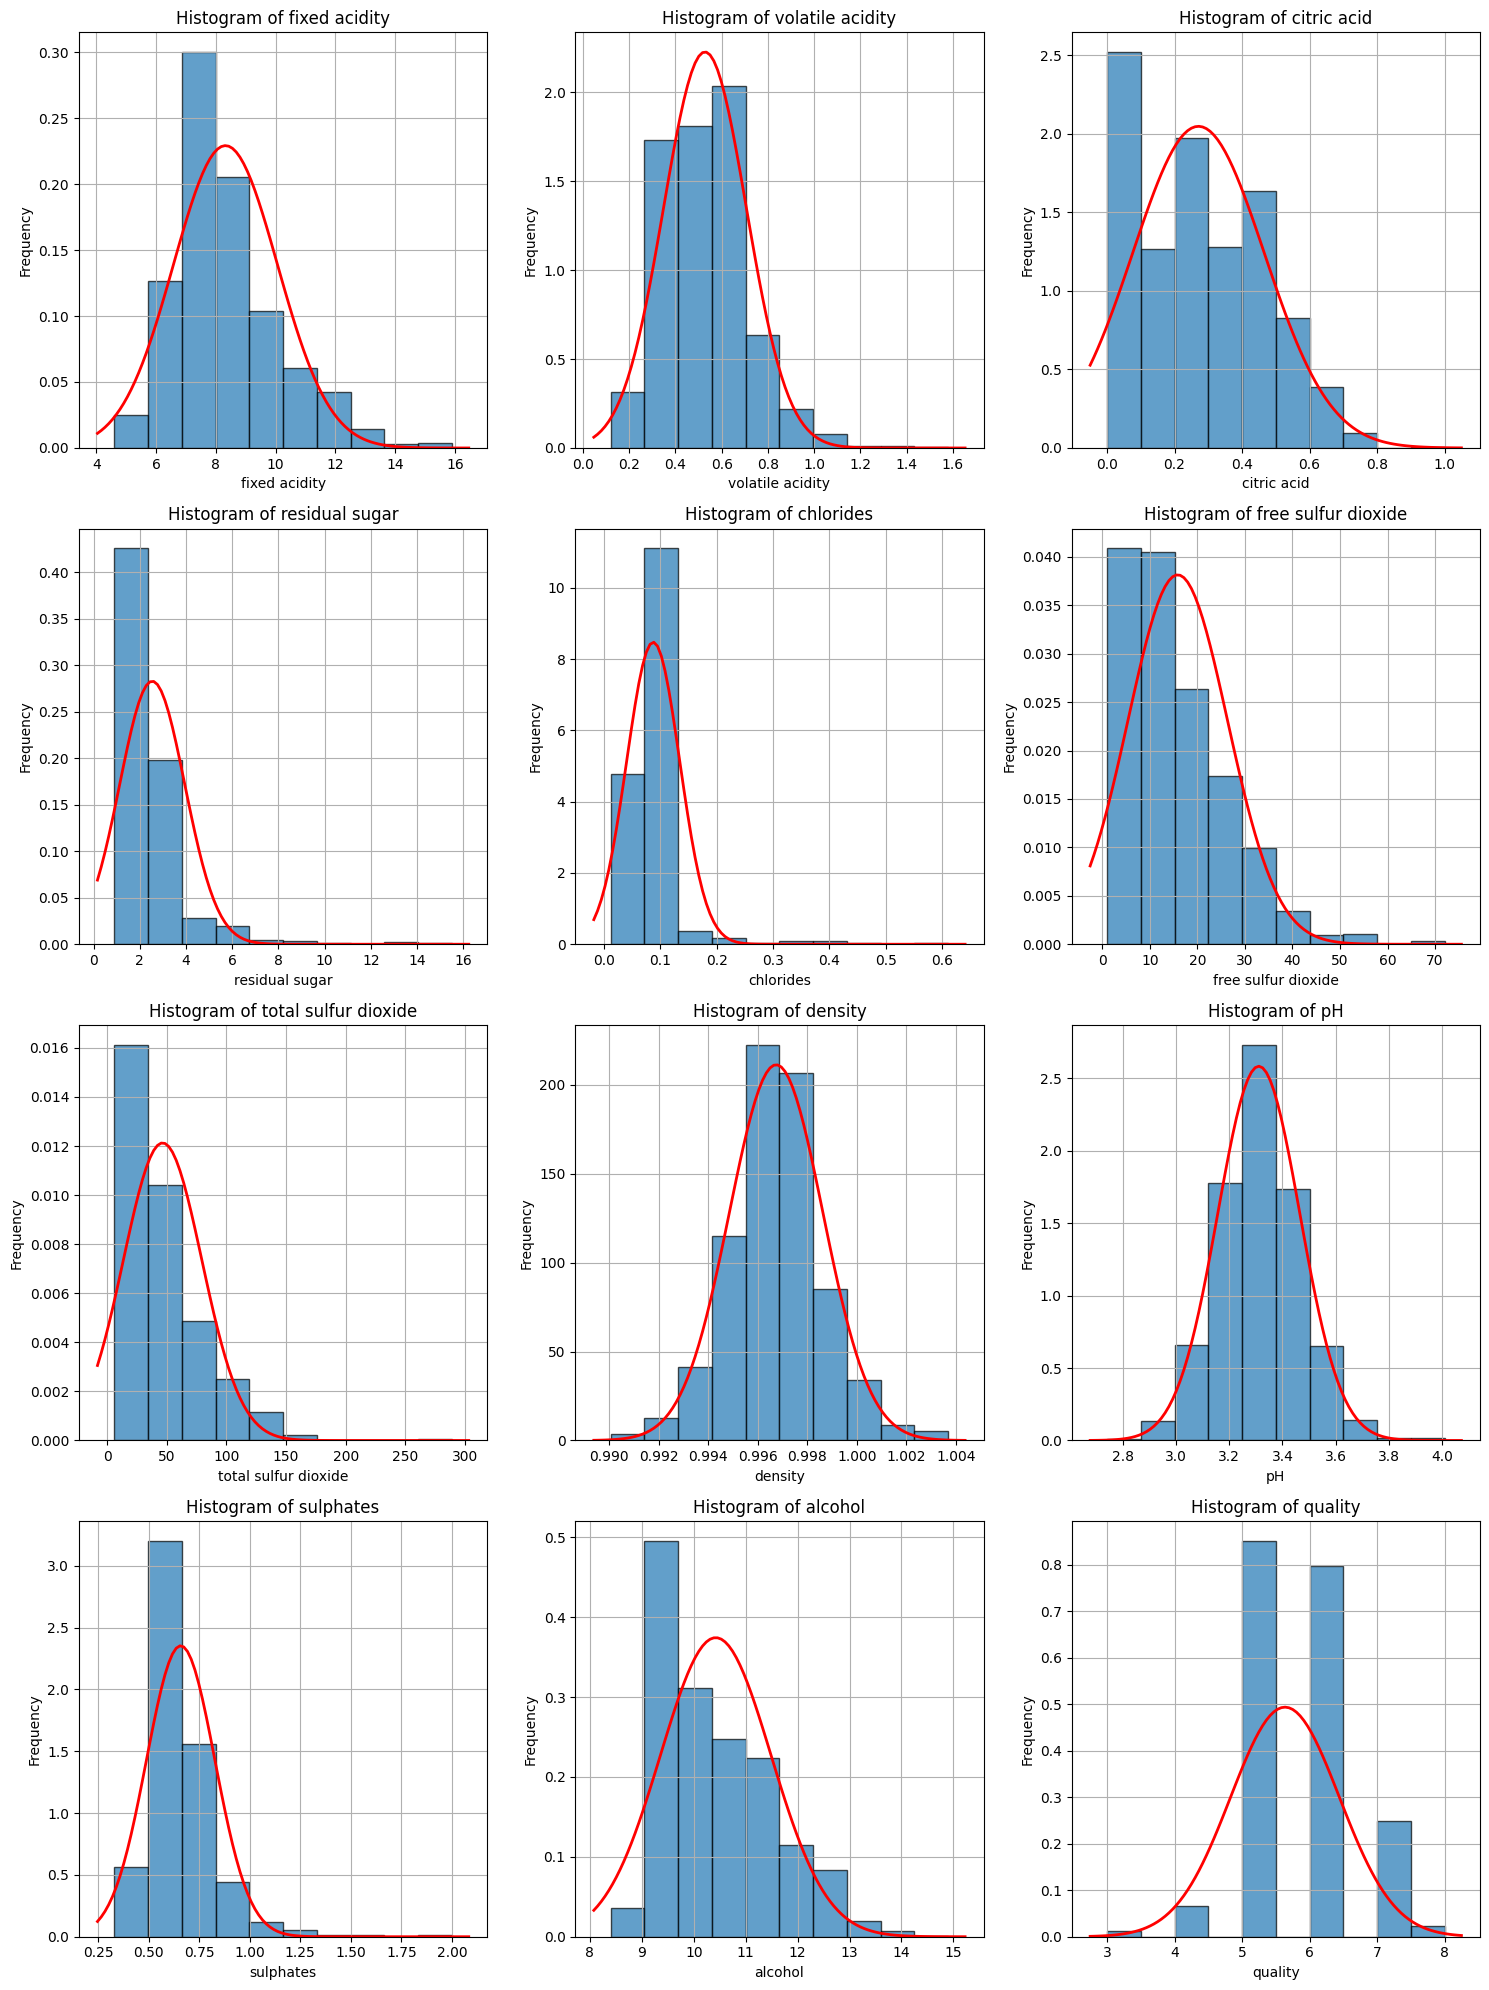

In [5]:
pl.show_histograms(red_wine_df, layout="grid", bell_curve=True)

Based on the histograms it seems that the density, pH and quality are normally distributed.


In [ ]:
pl.show_boxplots(red_wine_df, layout="grid")

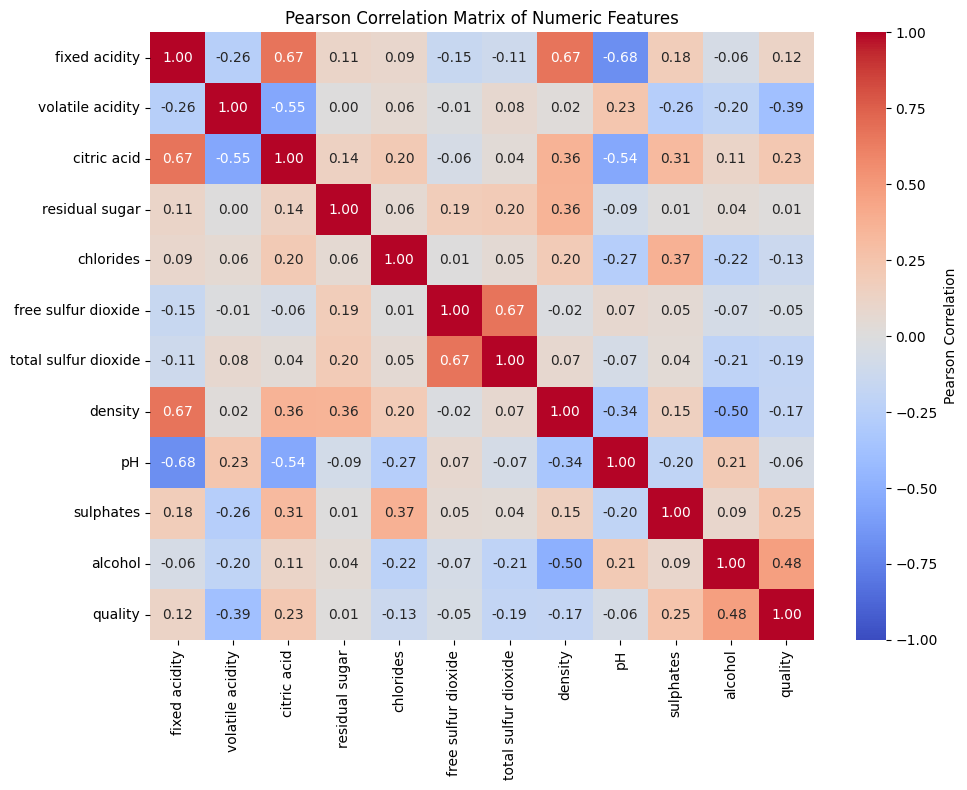

In [2]:
pl.show_correlation_heatmap(red_wine_df)

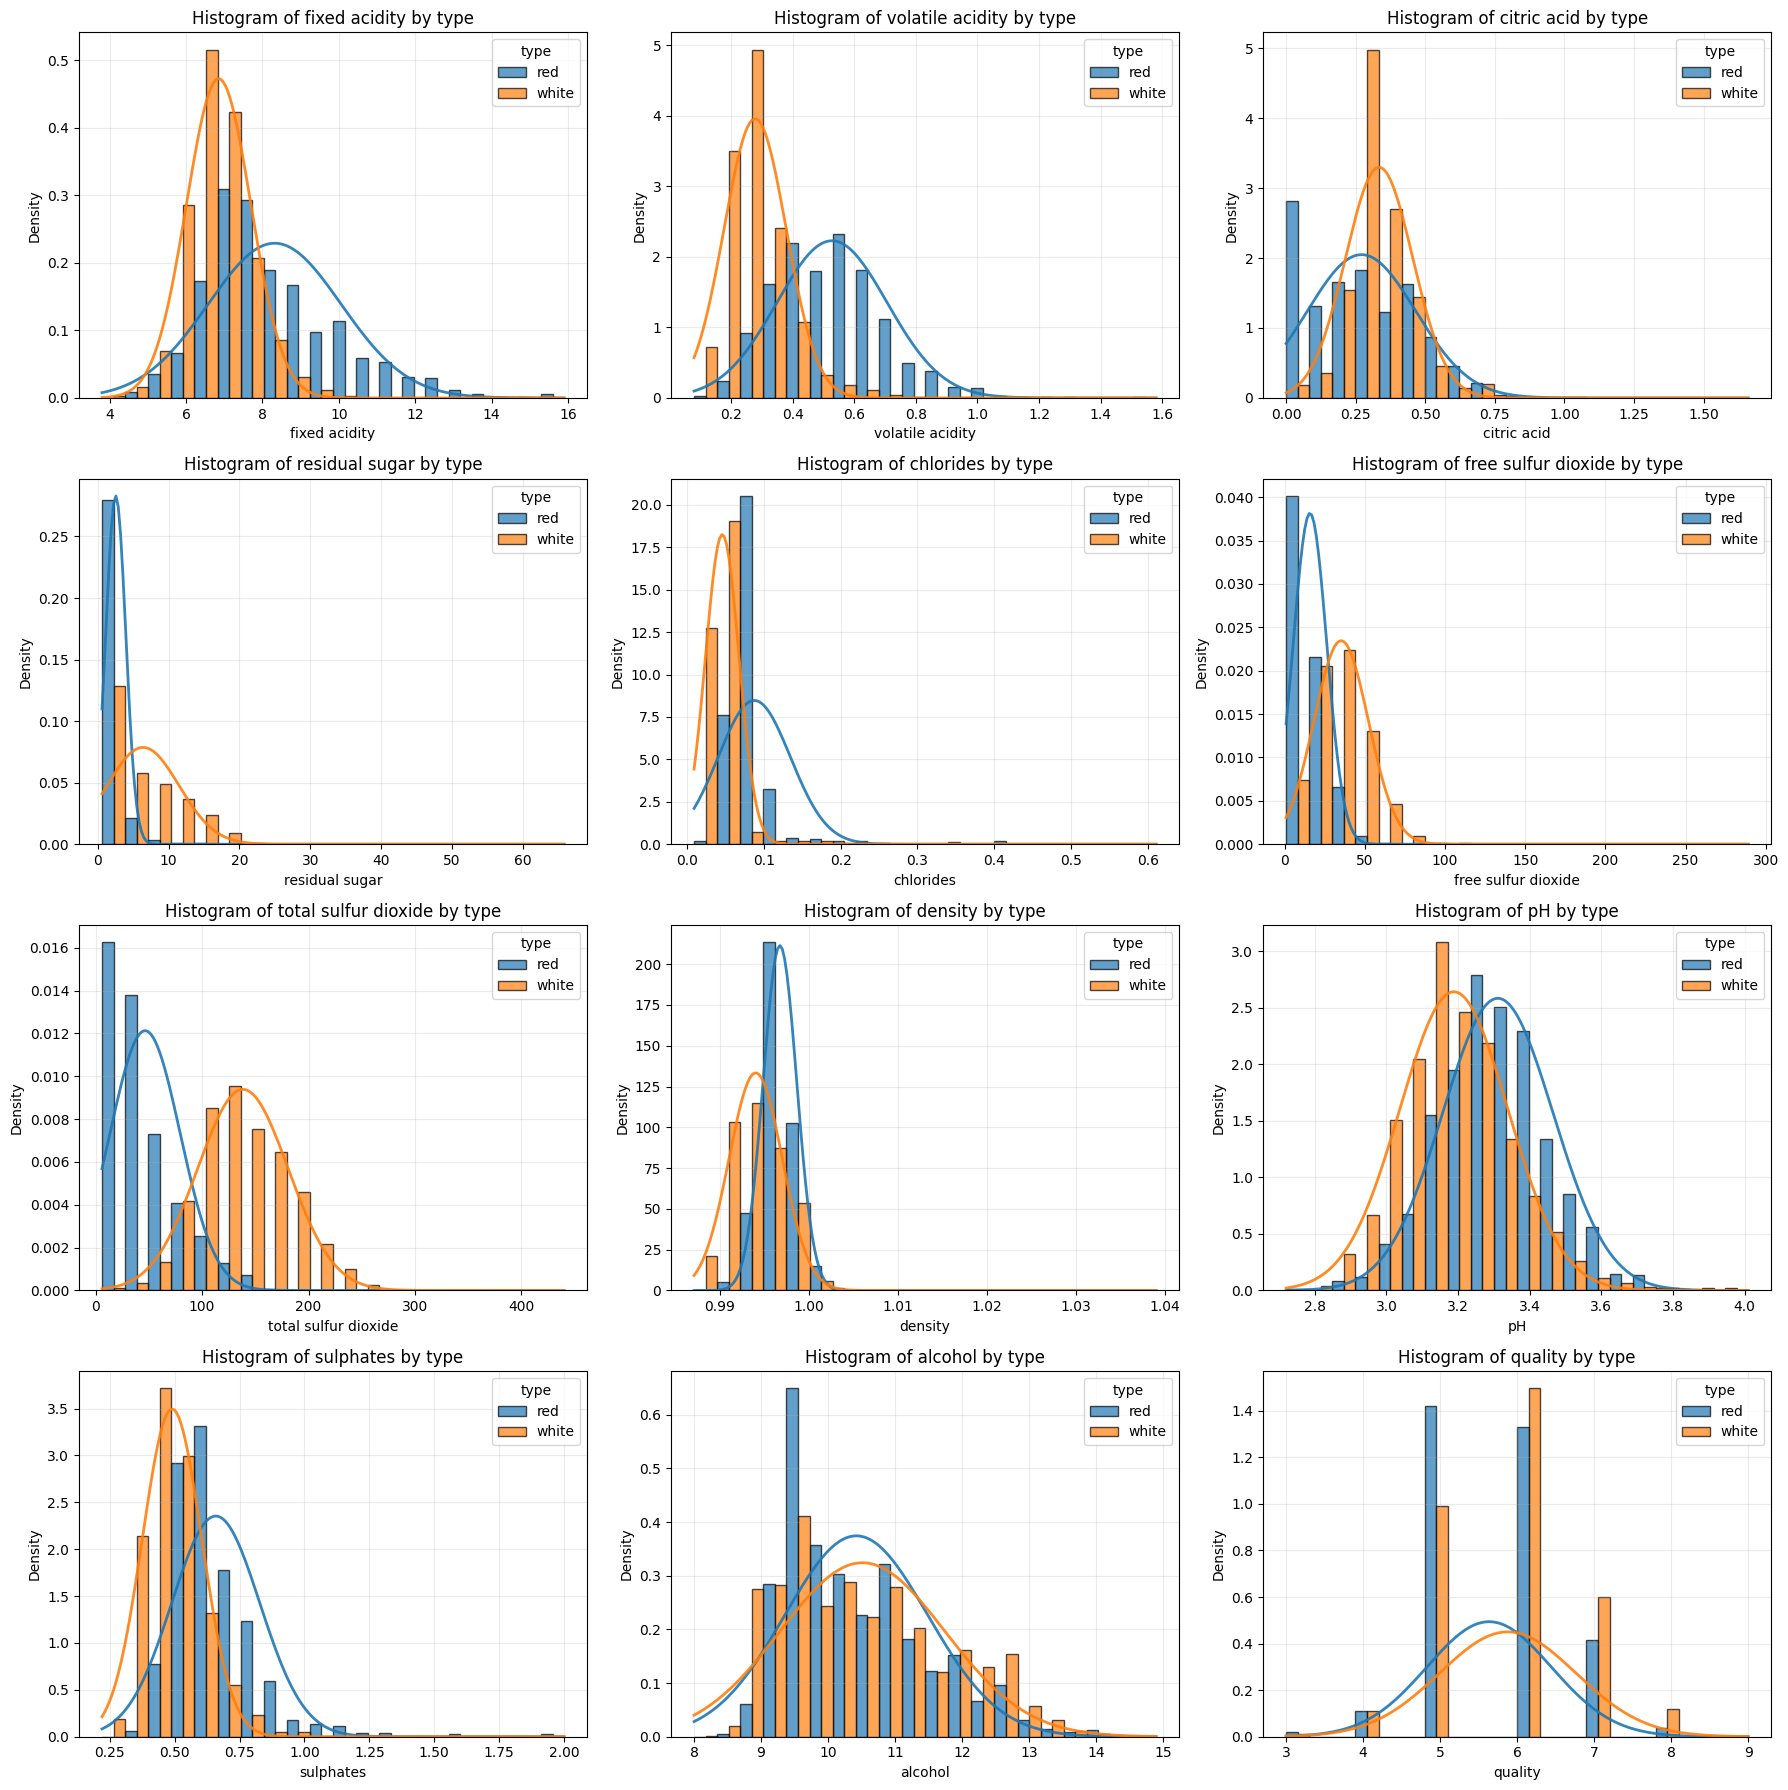

In [4]:
pl.show_grouped_histograms(combined_wine_df, bins=20, layout="grid", category_col="type", bell_curve=True, max_cols=3)


### Visualizing the Differences Between Red and White Wine Samples

**What does each diagram show?**

Each subplot is a histogram with a density curve, comparing red vs. white wine for a given chemical property or quality score:

- **Fixed acidity** – White wines generally have slightly lower fixed acidity than reds.  
- **Volatile acidity** – Reds tend to have higher volatile acidity.  
- **Citric acid** – Whites tend to have higher citric acid content.  
- **Residual sugar** – Whites generally have more residual sugar, but most wines cluster at low sugar levels.  
  - Reds cluster tightly at low residual sugar (<3 g/L).  
  - Whites show a much wider spread, with many wines above 5–10 g/L.  
- **Chlorides** – Reds and whites overlap, but whites have a longer tail (some with higher chlorides).  
- **Free sulfur dioxide** – Whites have higher values than reds.  
- **Total sulfur dioxide** – Whites also tend to have much higher levels than reds.  
- **Density** – Whites usually show slightly higher density.  
- **pH** – Reds are more acidic (lower pH).  
- **Sulphates** – Reds have higher sulphates.  
- **Alcohol** – Whites tend to have higher alcohol content.  
  - Reds center around 9–11% alcohol, while whites extend more strongly into 11–13% alcohol.  
- **Quality** – Both wines overlap, but whites lean slightly higher on average.  
  - Both types peak around quality levels 5–6.  
  - White wines have a small shift toward higher quality ratings compared to reds.  
  - The difference looks small but consistent, around **0.2–0.3 points** on the quality scale.  
  - **Conclusion:** White wines have slightly higher average quality.  


**Comparing alcohol and residual sugar with quality**

- **Alcohol vs. quality** – Higher alcohol levels seem to align with better quality wines, especially for whites.  
- **Residual sugar vs. quality** – Not a strong direct correlation. Many high-sugar whites still have mid-range quality (so sweetness alone doesn’t mean higher quality).  

**Conclusion:**  
Alcohol content has a stronger positive influence on quality than residual sugar does.  

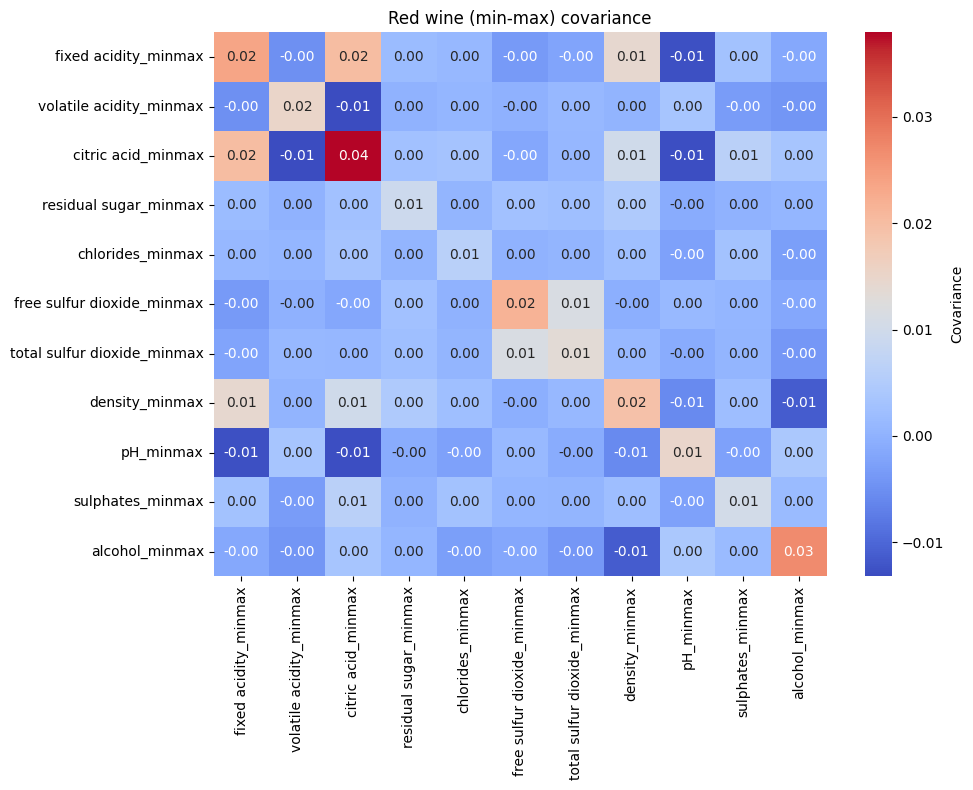

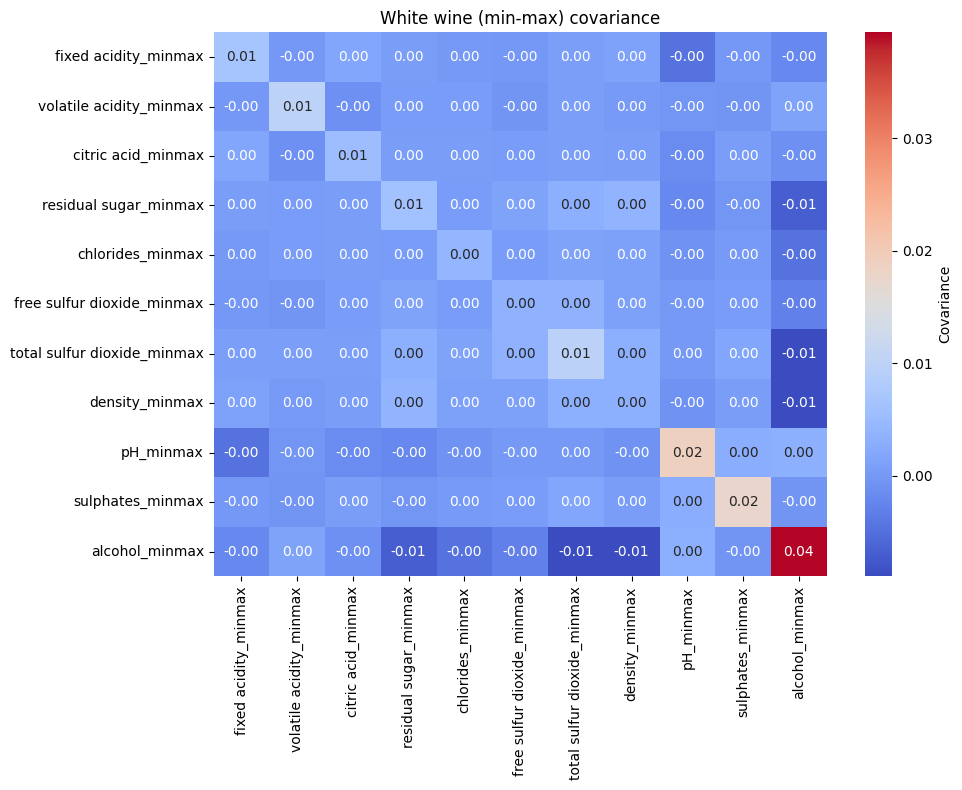

In [5]:
# Normalization example, scale per type (independently), append columsn and keep original
red_wine_scaled, white_wine_scaled = pl.normalize_data_seperated(red_wine_df, white_wine_df, method="minmax", exclude=["quality"])

# Covariance will change after scaling
pl.show_correlation_heatmap(red_wine_scaled, method="cov", title="Red wine (min-max) covariance")
pl.show_correlation_heatmap(white_wine_scaled, method="cov", title="White wine (min-max) covariance")
